In [ ]:
# calculate auto-correlation of the expression of neighboring genes 
#  based on TCGA expression values, Figure S1

In [41]:
library(reshape2) # for melt()
library(ggplot2)

In [1]:
basePath = "/data/bcu_projects/MelBrainSys_PostdocProject_Gruetzmann/publications/2022-my-MelBrainSys-paper/scripts-etc-for-publication/"
setwd(basePath)

In [44]:
outDirectory = paste0(basePath,"FiguresTables/")

In [2]:
geneExprTable = read.csv(file = "regNet/Data/TCGA-expression.csv", 
                         header = T, sep="\t",stringsAsFactors = F)
head(geneExprTable,3); dim(geneExprTable)

,geneSymbol,chr,pos,TCGA.BF.A1PU.01,TCGA.BF.A1PV.01,TCGA.BF.A1PX.01,TCGA.BF.A1PZ.01,TCGA.BF.A3DJ.01,TCGA.BF.A3DM.01,TCGA.BF.A3DN.01,⋯,TCGA.GF.A2C7.01,TCGA.GF.A3OT.06,TCGA.GN.A262.06,TCGA.GN.A263.01,TCGA.GN.A265.06,TCGA.GN.A267.06,TCGA.GN.A268.06,TCGA.GN.A26A.06,TCGA.GN.A26D.06,TCGA.HR.A5NC.01
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NOC2L,chr1,887127,6.702927,7.506216,7.3536418,7.5527593,6.7940935,7.8001608,6.438719,⋯,6.320593,7.774894,7.869414,5.85987063,8.0767768,7.698355,7.609606,8.2928188,6.689367,6.129037
2,KLHL17,chr1,898531,2.524458,3.581854,1.8863971,3.3867555,2.5493458,2.4142473,1.246689,⋯,2.304777,4.523496,3.997421,0.04818819,3.2792568,3.688836,4.444516,3.1149303,1.624958,2.909801
3,HES4,chr1,934947,1.030696,3.166422,0.3773996,0.9425393,-0.9829983,0.9366146,-2.111562,⋯,-1.218591,2.376759,1.699015,-0.06880224,0.1592957,2.768496,1.789248,-0.4265386,-1.908413,-2.078192


[1] 8251  273

In [3]:
# make sure genes are sorted by chr/position
class(geneExprTable$chr); class(geneExprTable$pos)
o = order(geneExprTable$chr,geneExprTable$pos)
head(o)
table(o[2:length(o)]-o[1:(length(o)-1)]) # already in desired order

[1] "character"

[1] "integer"

[1] 1 2 3 4 5 6


   1 
8250 

In [4]:
# double check that there are no NAs inside:
table(apply(geneExprTable[,-c(1:3)],2,function(c) length(which(is.na(c)))))
# no NA in any column


  0 
270 

In [5]:
# speed up by having a double matrix of gene expr values:
geneExprTableM = as.matrix(geneExprTable[,-c(1:3)])
class(geneExprTableM); typeof(geneExprTableM); dim(geneExprTableM)

[1] "matrix" "array"

[1] "double"

[1] 8251  270

### calculate correlations

In [6]:
# for each chr, get indexes of respective genes in expression array:
chrIdx = sapply(unique(geneExprTable$chr), function(chr) which(geneExprTable$chr == chr))

In [7]:
length(chrIdx)
sapply(names(chrIdx), function(chr) head(chrIdx[[chr]]))
# OK

[1] 24

$chr1
[1] 1 2 3 4 5 6

$chr10
[1] 857 858 859 860 861 862

$chr11
[1] 1182 1183 1184 1185 1186 1187

$chr12
[1] 1668 1669 1670 1671 1672 1673

$chr13
[1] 2142 2143 2144 2145 2146 2147

$chr14
[1] 2302 2303 2304 2305 2306 2307

$chr15
[1] 2590 2591 2592 2593 2594 2595

$chr16
[1] 2872 2873 2874 2875 2876 2877

$chr17
[1] 3275 3276 3277 3278 3279 3280

$chr18
[1] 3785 3786 3787 3788 3789 3790

$chr19
[1] 3892 3893 3894 3895 3896 3897

$chr2
[1] 4507 4508 4509 4510 4511 4512

$chr20
[1] 5082 5083 5084 5085 5086 5087

$chr21
[1] 5313 5314 5315 5316 5317 5318

$chr22
[1] 5390 5391 5392 5393 5394 5395

$chr3
[1] 5591 5592 5593 5594 5595 5596

$chr4
[1] 6084 6085 6086 6087 6088 6089

$chr5
[1] 6365 6366 6367 6368 6369 6370

$chr6
[1] 6748 6749 6750 6751 6752 6753

$chr7
[1] 7114 7115 7116 7117 7118 7119

$chr8
[1] 7472 7473 7474 7475 7476 7477

$chr9
[1] 7759 7760 7761 7762 7763 7764

$chrX
[1] 8079 8080 8081 8082 8083 8084

$chrY
[1] 8250 8251

In [19]:
# calculate auto-correlation using acf() of stat package
# iterate over chromosomes separately
# iterate over all 270 TCGA samples
# allAcfs is a list of chromosomes, each containing a matrix of dimension maximum lag x samples, 
#  matrix entries are the correlations of gene expressions of genes with "lag" distance in the sample on that chromosome
allAcfs = lapply (names(chrIdx), function(chr) {
    sapply(1:ncol(geneExprTableM), function(sampleIdx) {
        acfRes = acf(geneExprTableM[chrIdx[[chr]],sampleIdx], lag.max = 200,plot = F)
        acfRes$acf[,1,1]
    })
})
names(allAcfs) = names(chrIdx)

In [20]:
dim(allAcfs$chr21)
allAcfs$chr21[1:4,1:4]

[1]  77 270

1.00000000,1.000000000,1.00000000,1.000000000
0.01798633,0.078821568,0.16763255,-0.002221909
-0.09667505,-0.089681954,-0.05444057,-0.116653784
0.03926989,0.002156851,-0.17866093,-0.153840516


In [21]:
neededChr = setdiff(names(chrIdx),"chrY")
o=order(as.numeric(gsub("chr(\\d+.*)","\\1",neededChr)))
neededChr = neededChr[o]
neededChr

Warning message in order(as.numeric(gsub("chr(\\d+.*)", "\\1", neededChr))):
“NAs introduced by coercion”


[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22" "chrX"

In [22]:
neededQuantiles = c(0 ,0.1 ,0.25 ,0.5 ,0.75, 0.9, 1 )

In [23]:
# quantiles over all samples, separately for all combinations of all chr and lags
allAcfQuantiles = NULL
for(chr in neededChr) {
    q = t(sapply(1:nrow(allAcfs[[chr]]),function(lag) quantile(allAcfs[[chr]][lag,],neededQuantiles)))
    colnames(q) = gsub("\\%","",paste0("quant_",colnames(q)))
    allAcfQuantiles = rbind(allAcfQuantiles, data.frame(chr=chr,lag = 1:nrow(allAcfs[[chr]]), q))
}

In [24]:
# condense the data of all chromosomes: 
allAcfQuantilesChrCondensed = NULL
for(lag in sort(unique(allAcfQuantiles$lag))) {
    allAcfQuantilesChrCondensed = 
        rbind(allAcfQuantilesChrCondensed,
              data.frame(lag=lag,t(colMeans(allAcfQuantiles[ allAcfQuantiles$lag==lag,-c(1,2)]))))
}

head(allAcfQuantilesChrCondensed,3)

,lag,quant_0,quant_10,quant_25,quant_50,quant_75,quant_90,quant_100
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,1.0000000,1.0000000
2,2,-0.04203487,0.02556293,0.050092617,0.08077597,0.11664481,0.1587498,0.3175710
3,3,-0.07891550,-0.01993895,0.004967375,0.03377344,0.06870447,0.1114801,0.2665033


### make the actual plot

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_vline()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_vline()`).”


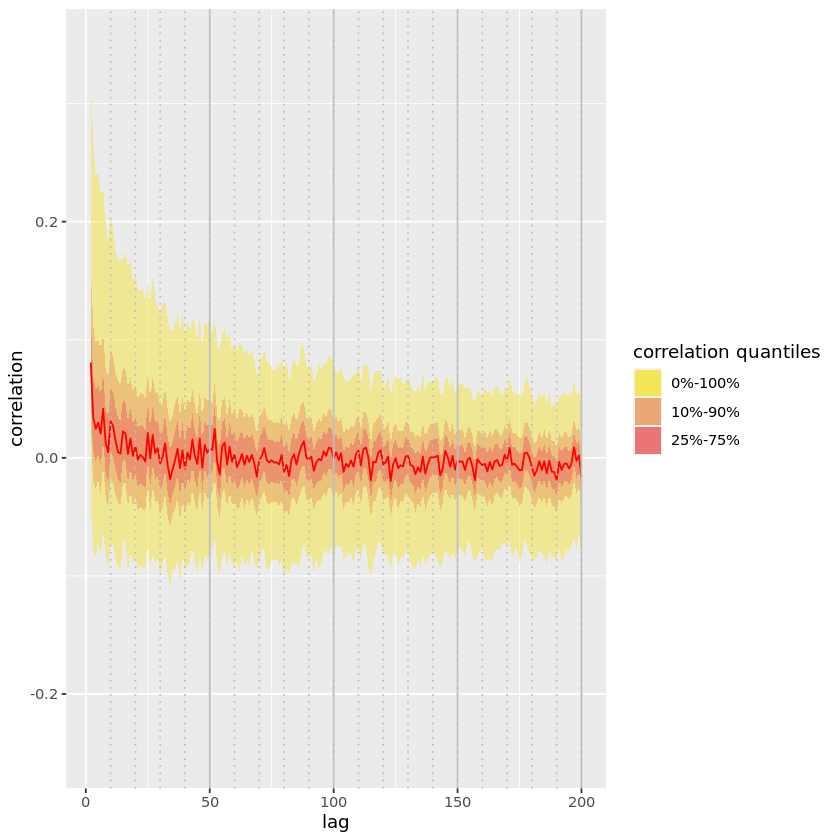

In [43]:
fillCols = c("0%-100%" = "#f3e43f", "10%-90%" = "#e99d63",  "25%-75%" = "#e96363")
lineType = c("10%-90%" = "dashed", "0%-100%" = "dotted")
p = ggplot(data = allAcfQuantilesChrCondensed, mapping=aes(x=lag)) +
    geom_ribbon(aes(ymin = quant_0, ymax = quant_100, fill = "0%-100%"), alpha = .5) + 
    geom_ribbon(aes(ymin = quant_10, ymax = quant_90, fill = "10%-90%"), alpha = .5) + 
    geom_ribbon(aes(ymin = quant_25, ymax = quant_75, fill = "25%-75%"), alpha = .5) + 
    geom_line(mapping = aes(y = quant_50), col="red") + 
    geom_vline(xintercept = seq(0,200,50), col="grey" ) + 
    geom_vline(xintercept = seq(0,200,10), col="grey",linetype="dotted" ) + 
        xlim(c(2,200)) + ylim(c(-0.25,0.35))  + 
     labs(y = "correlation") + 
    scale_fill_manual(values = fillCols, name = "correlation quantiles") #+ 
p

In [46]:
png(filename = paste0(outDirectory, "SupplFigure-S1-expr-auto-correlation.png"),
    width = 2000,height=1200, res = 340)
p
dev.off()

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_vline()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_vline()`).”


png 
  2